In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# use natural language toolkit
import nltk
from nltk.stem.lancaster import LancasterStemmer
import os
import json
import datetime
stemmer = LancasterStemmer()

In [15]:
df = pd.read_csv("~/Desktop/MachineLearning/train.csv").fillna("")

AttributeError: module 'pandas' has no attribute 'read_arff'

In [7]:
df.head()

NameError: name 'df' is not defined

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


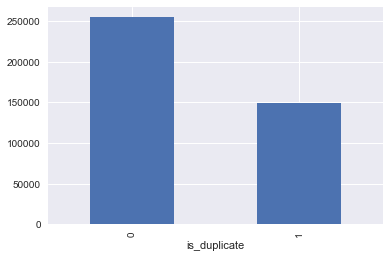

In [13]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [14]:
dfs=df[0:4000]

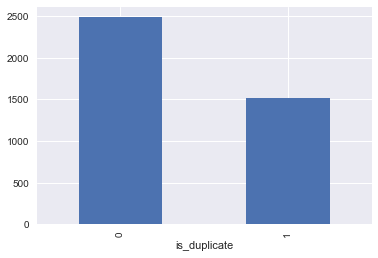

In [15]:
dfs.groupby("is_duplicate")['id'].count().plot.bar()

In [16]:
dfq1, dfq2 = dfs[['qid1', 'question1']], dfs[['qid2', 'question2']]
dfq1.columns = ['qid1', 'question']
dfq2.columns = ['qid2', 'question']

# merge two two dfs, there are two nans for question
dfqa = pd.concat((dfq1, dfq2), axis=0).fillna("")
nrows_for_q1 = dfqa.shape[0]/2
dfqa.shape

(8000, 3)

In [24]:
dfqa.head(8000)

,qid1,qid2,question
0,1,,What is the step by step guide to invest in sh...
1,3,,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,,How can I increase the speed of my internet co...
3,7,,Why am I mentally very lonely? How can I solve...
4,9,,"Which one dissolve in water quikly sugar, salt..."
5,11,,Astrology: I am a Capricorn Sun Cap moon and c...
6,13,,Should I buy tiago?
7,15,,How can I be a good geologist?
8,17,,When do you use シ instead of し?
9,19,,Motorola (company): Can I hack my Charter Moto...


In [22]:
#Transform questions by TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
mq1 = TfidfVectorizer(max_features = 256).fit_transform(dfqa['question'].values)
mq1
# note a sparse matrix is a matrix where most of the values are zero

<8000x256 sparse matrix of type '<class 'numpy.float64'>'
	with 49542 stored elements in Compressed Sparse Row format>

In [36]:
#Since we are looking at pairs of data, we will be taking the difference of all question one and question two pairs with this. 
#This will result in a matrix that again has the same number of rows as the subsampled data and one vector that describes the 
#relationship between the two questions.
diff = np.abs(mq1[::2] - mq1[1::2])
diff

<4000x256 sparse matrix of type '<class 'numpy.float64'>'
	with 46201 stored elements in Compressed Sparse Row format>

In [45]:
#t-SNE is the very popular algorithm to extremely reduce the dimensionality of your data in order to visually present it. 
#It is capable of mapping hundreds of dimensions to just 2 while preserving important data relationships, that is, 
#when closer samples in the original space are closer in the reduced space.

from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=200,
    verbose=2,
    angle=0.5
).fit_transform(diff.toarray())

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.445830
[t-SNE] Iteration 25: error = 1.6764634, gradient norm = 0.0092044
[t-SNE] Iteration 50: error = 1.6253616, gradient norm = 0.0089295
[t-SNE] Iteration 75: error = 1.3960834, gradient norm = 0.0040127
[t-SNE] Iteration 100: error = 1.3385195, gradient norm = 0.0046509
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.338519
[t-SNE] Iteration 125: error = 1.2370962, gradient norm = 0.0011350
[t-SNE] Iteration 150: error = 1.2067537, gradient norm = 0.0016405
[t-SNE] Iteration 175: error = 1.1998152, gradient norm = 0.0022244
[t-SNE] Iteration 200: error = 1.1999435, gradient norm = 0.0026549
[t-SNE]

In [46]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = dfs['is_duplicate'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [41]:
#t-SNE is not telling us much about the structure of the space that we created. 
#There seem to be no clusters of either class present.